In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
data= pd.read_csv("insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#shape of the dataset
data.shape

(1338, 7)

In [5]:
#discription of the data
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
mean=data.bmi.mean()

In [7]:
std=data.bmi.std()

In [8]:
std

6.098186911679017

In [9]:
mean+3*std

48.957957596023604

In [10]:
out=data[data.bmi >= 48.957]
out

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [11]:
data=data[data.bmi<=48.957]
data.shape

(1334, 7)

In [12]:
#checking the null values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#unique values in column "sex"
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [14]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='smoker', ylabel='count'>

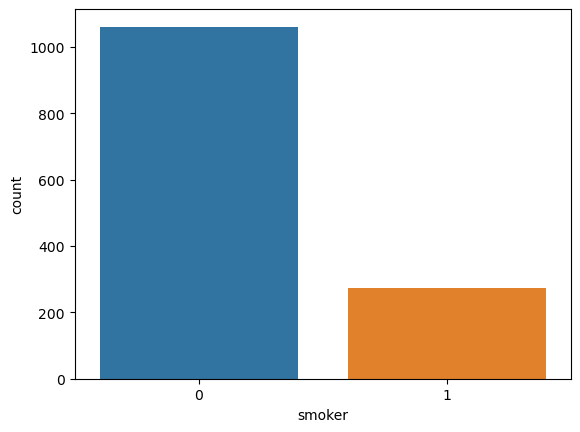

In [38]:
sns.countplot(x=data["smoker"],data=data)


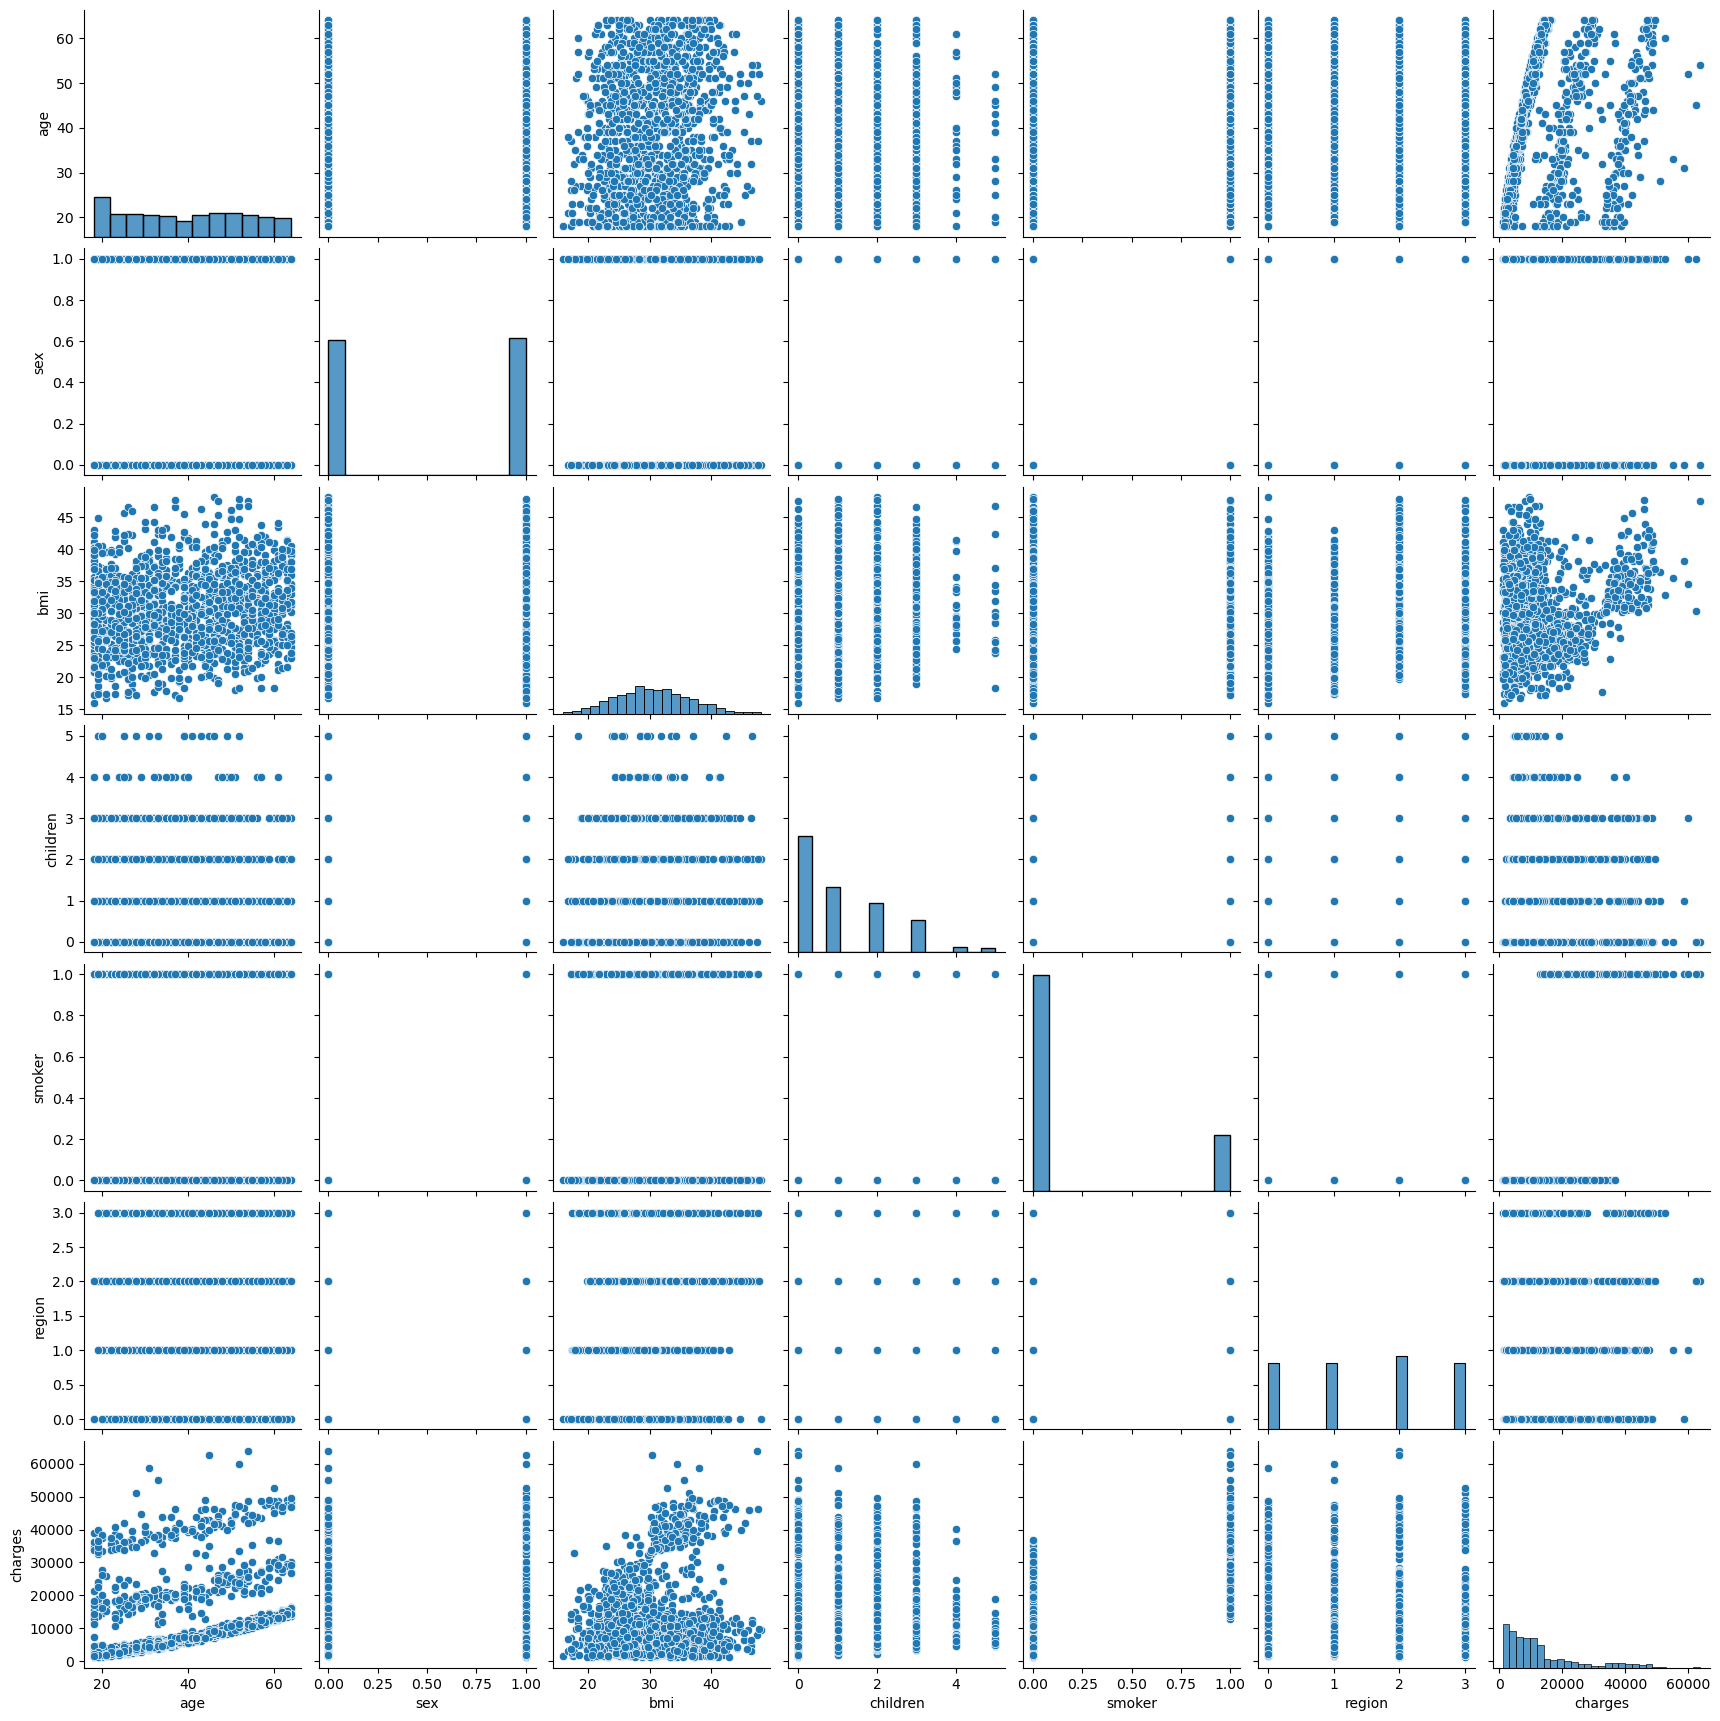

In [16]:
#encoding the categorical data
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder() 
data["sex"]=le.fit_transform(data["sex"])
data["smoker"]=le.fit_transform(data["smoker"])
data["region"]=le.fit_transform(data["region"])
sns.pairplot(data)

In [17]:
#feature matrix
x=data.iloc[:,0:-1].values
y=data.iloc[:,-1].values
data.shape

(1334, 7)

In [18]:
#spliting the data in to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)


In [19]:
#import regression model
from sklearn.ensemble import RandomForestRegressor
regression=RandomForestRegressor(n_estimators=3,random_state=0)
regression.fit(x_train,y_train)

RandomForestRegressor(n_estimators=3, random_state=0)

In [20]:
y_pred=regression.predict(x_test)

In [21]:
#import r2_score
from sklearn.metrics import r2_score

#check the score of the model
r2_score(y_test,y_pred)

0.8268526568659677

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [24]:
y_pred=lr.predict(x_test)

In [25]:
r2_score(y_test,y_pred)

0.7590216885453016

In [26]:
from xgboost import XGBRegressor
regression=XGBRegressor()
regression.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:
y_pred=regression.predict(x_test)

In [28]:
r2_score(y_test,y_pred)

0.8141542231141773

In [29]:
from sklearn.model_selection import GridSearchCV
parameters={
    'learning_rate':[0.1,0.15,0.2,0.25,0.3],
    'max_depth':[3,4,5,6,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4,5]
}

In [30]:
cv=GridSearchCV(estimator=regression,param_grid=parameters,cv=10)

In [31]:
#cv.fit(x_train,y_train)

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
parameters={
    'learning_rate':[0.1,0.15,0.2,0.25,0.3],
    'max_depth':[3,4,5,6,7],
    'gamma':[0.1,0.2,0.3,0.4],
    'min_child_weight':[1,2,3,4,5]
}

In [34]:
randomcv=RandomizedSearchCV(estimator=regression,param_distributions=parameters,cv=10,n_jobs=-1)
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.1, 0.15, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5]})

In [35]:
randomcv.best_score_

0.8375389680404179

In [36]:
randomcv.best_params_

{'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.2}

In [37]:
randomcv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#hence xgbregression with randomsearchcv huperparameter tuning gives high accuracy i.e 83.75